In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df = pd.read_csv ("Bakery sales.csv")

df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [68]:
df = df[['date','time', 'article','Quantity','unit_price']]

In [69]:
df.describe()

,Quantity
count,234005.000000
mean,1.538377
std,1.289603
min,-200.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,200.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        234005 non-null  object 
 1   time        234005 non-null  object 
 2   article     234005 non-null  object 
 3   Quantity    234005 non-null  float64
 4   unit_price  234005 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.9+ MB


In [71]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [72]:
# Parse 'unit_price' to a numerical format by removing the currency symbol and converting to float
df['unit_price'] = df['unit_price'].str.replace(',', '.').str.replace(' €', '').astype(float)

In [73]:
# Aggregate sales by date
daily_sales = df.groupby('date').agg({'Quantity': 'sum'}).reset_index()

In [74]:
# Create additional time features
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day'] = daily_sales['date'].dt.day

In [75]:
daily_sales.head()

,date,Quantity,day_of_week,month,day
0,2021-01-02,581.0,5,1,2
1,2021-01-03,564.0,6,1,3
2,2021-01-04,315.0,0,1,4
3,2021-01-05,309.0,1,1,5
4,2021-01-07,310.0,3,1,7


In [76]:
# Split the data into train and test sets
train, test = train_test_split(daily_sales, test_size=0.2, shuffle=False)

# Prepare features and target
X_train = train[['day_of_week', 'month', 'day']]
y_train = train['Quantity']
X_test = test[['day_of_week', 'month', 'day']]
y_test = test['Quantity']

### Random Forest

Root Mean Squared Error: 141.98132079314752


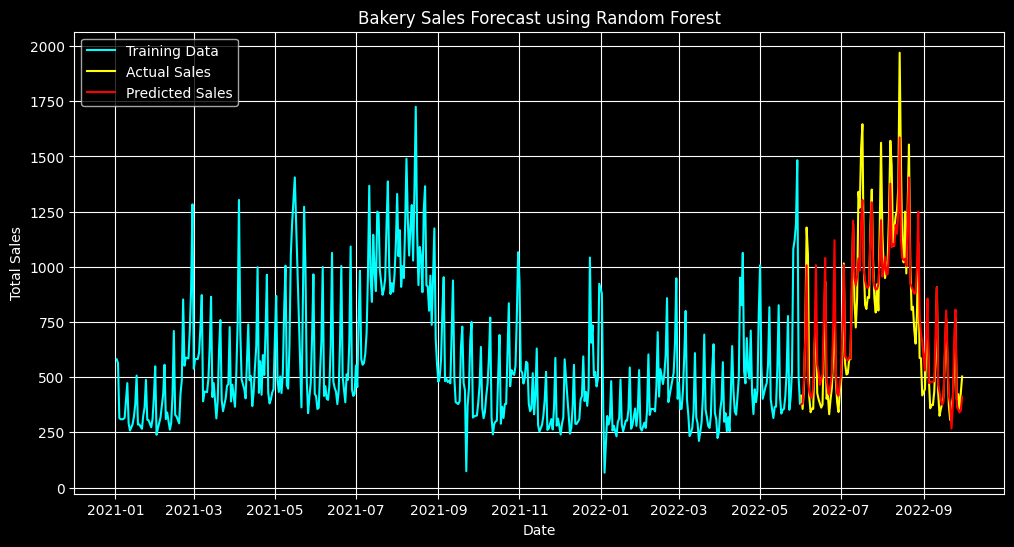

In [77]:
# Fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'Root Mean Squared Error: {rmse}')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train['date'], y_train, label='Training Data', color='cyan')
plt.plot(test['date'], y_test, label='Actual Sales', color='yellow')
plt.plot(test['date'], preds, label='Predicted Sales', color='red')
plt.title('Bakery Sales Forecast using Random Forest')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()